# National Park Scraping Project

Scraping the total Vistors of different National Parks in 2016

In [1]:
import pandas as pd
import numpy as np

In [2]:
parkList = pd.read_csv('Nationalpark__List.csv')

In [3]:
parkList = parkList.sort_values(by = 'Number_of_Visitors', ascending = False)

In [4]:
top10 = parkList.head(15)

In [5]:
from bokeh.plotting import figure
from bokeh.charts import Bar
from bokeh.charts.attributes import CatAttr
from bokeh.models import HoverTool, NumeralTickFormatter
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [6]:
# create a new plot using figure
p = figure(plot_width=1000, plot_height=400)

visitors = parkList.groupby('ParkName')[['Number_of_Visitors']].mean().sort_values('Number_of_Visitors', ascending=False).head(15)
p = Bar(visitors, label=CatAttr(columns=['ParkName'], sort=False), values='Number_of_Visitors', color='ParkName')

p.legend.location = None
p.xaxis.axis_label = "ParkName"
p.yaxis.axis_label = "Visitors"

# x and y here refer to the x-axis and y-axis in your graph.
hover = HoverTool(tooltips=[
    ("ParkName", "@x"),
    ("Number_of_Visitors", "@y"),
])
p.add_tools(hover)

show(p)

Word Cloud based the TripAdivisors reviews

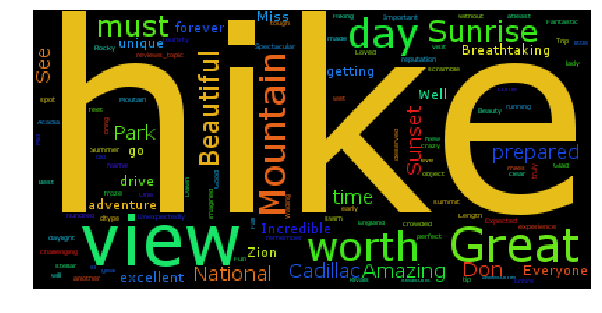

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
reviews_1 = pd.read_csv('/Users/joshualee/Downloads/reviews_1.csv', header = None)
reviews_1.columns = ['ratings', 'reviews_index', 'reviews_topic']
reviews_1 = reviews_1.dropna(axis=0, how='any')
from os import path
from scipy.misc import imread
import random
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

stopwords = set(STOPWORDS)
fig_cloud = plt.figure(figsize = (10,10))
wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 1.0,
                      stopwords = stopwords, # set or space-separated string
                      regexp = r"\w[^\d\W']+"
                      ).generate(str(reviews_1.reviews_topic))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Scraping from the national park.gov to get the stats of each national parks

In [10]:
import datetime
from datetime import date
from fbprophet import Prophet

camping= pd.read_csv('National_park_camp.csv')

Time series model of Great Smoky Mountain National Park

/Users/joshualee/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/joshualee/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run pro

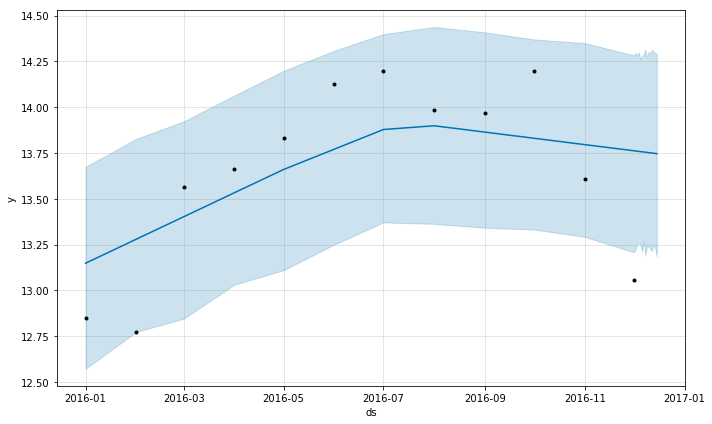

In [11]:
import matplotlib.pyplot as plt
camping_smoky = camping.loc[camping['ParkName'] == 'Great Smoky Mountain']
camping_smoky['y'] = np.log(camping_smoky['Recreation Visitors'])
camping_smoky['ds']=camping_smoky['Month']
visitors = camping_smoky[['ds', 'y']]
visitors


m = Prophet()
m.fit(visitors)
future = m.make_future_dataframe(freq = 'D', periods=14)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat']].tail()
forecast
m.plot(forecast)
plt.show()


Time series model of Yosemite National Park

/Users/joshualee/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/joshualee/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run pro

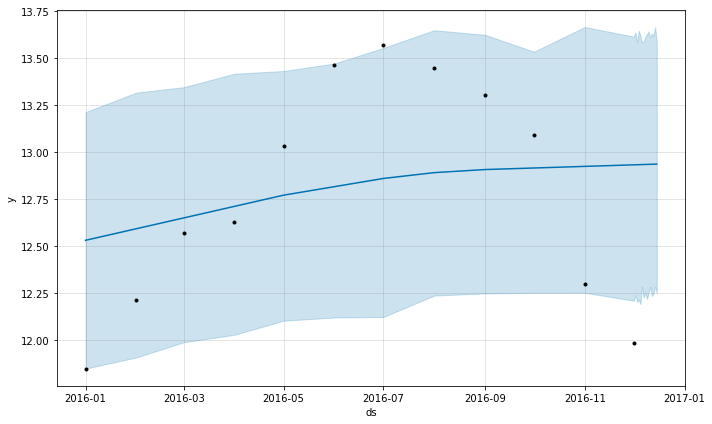

In [12]:
import matplotlib.pyplot as plt
camping_yosemite = camping.loc[camping['ParkName'] == 'Yosemite']
camping_yosemite['y'] = np.log(camping_yosemite['Recreation Visitors'])
camping_yosemite['ds']=camping_yosemite['Month']
visitors = camping_yosemite[['ds', 'y']]
visitors


m = Prophet()
m.fit(visitors)
future = m.make_future_dataframe(freq = 'D', periods=14)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat']].tail()
forecast
m.plot(forecast)
plt.show()


Scraping the campground data of each National Park

In [14]:
import glob, os
path = r'/Users/joshualee/Desktop/National_Park_Project'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))    # advisable to use os.path.join as this makes concatenation OS independent
df_from_each_file = (pd.read_csv(f) for f in all_files)
campground   = pd.concat(df_from_each_file, ignore_index=True)

In [15]:
cols = ['Longtitude','Latitude','Reviews','Maximum_Number_of_People']
campground[cols] = campground[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [17]:
count_=campground.groupby(['ParkName'])['Maximum_Number_of_People'].sum()
count_ = count_.reset_index()

In [21]:
top10.ParkName=top10.ParkName.replace('Great Smoky Mountains National Park', 'Great Smoky Mountain')
top10.ParkName=top10.ParkName.replace('Grand Canyon National Park', 'GrandCanyon')
top10.ParkName=top10.ParkName.replace('Yosemite National Park', 'Yosemite')
top10.ParkName=top10.ParkName.replace('Rocky Mountain National Park', 'Rocky Mountain')
top10.ParkName=top10.ParkName.replace('Zion National Park', 'Zion')
top10.ParkName=top10.ParkName.replace('Glacier National Park', 'Glacier')
top10.ParkName=top10.ParkName.replace('Olympic National Park', 'Olympic')
top10.ParkName=top10.ParkName.replace('Acadia National Park', 'Acadia')
top10.ParkName=top10.ParkName.replace('Joshua Tree National Park', 'Joshua Tree')
top10.ParkName=top10.ParkName.replace('Cuyahoga Valley National Park', 'Cuyahoga Valley')
top10.ParkName=top10.ParkName.replace('Bryce Canyon National Park', 'Bryce Canyon')
top10.ParkName=top10.ParkName.replace('Arches National Park', 'Arches')
top10=top10[top10.ParkName != 'Yellow Stone National Park']
top10=top10[top10.ParkName != 'Grand Teton National Park']
top10=top10[top10.ParkName != 'Hawai Volcanoes National Park']
top10 = top10.drop('Location', 1)

/Users/joshualee/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [22]:
total=pd.merge(top10, count_, how='inner', on ='ParkName')
total['August'] =[1183778,743158,692450,772849,477507,813267,735945,748565,148427,743158,365738,188340]
total['campers']=[3010,6650,11555,186,2458,128,2250,293,2403,365,791,317]
total['density']=total['campers']/total['August']
total['high_weather'] = [87,103,89,77,98,69,76,78,99,81,77,97]
total['low_weather'] = [60,75,56,45,68,51,56,46,68,62,50,66]
total['mean_weather']=[74,89,73,61,83,60,66,62,84,72,64,82]
total=total.sort_values('density')

In [23]:
p = figure(plot_width=1000, plot_height=400)

p = Bar(total, label=CatAttr(columns=['ParkName'], sort=False), values='density', color='ParkName')

p.legend.location = None
p.xaxis.axis_label = "ParkName"
p.yaxis.axis_label = "Density"

# x and y here refer to the x-axis and y-axis in your graph.
hover = HoverTool(tooltips=[
    ("ParkName", "@x"),
    ("Number_of_Visitors", "@y"),
])
p.add_tools(hover)

show(p)

Check which National Park has the highest accommodation for campers

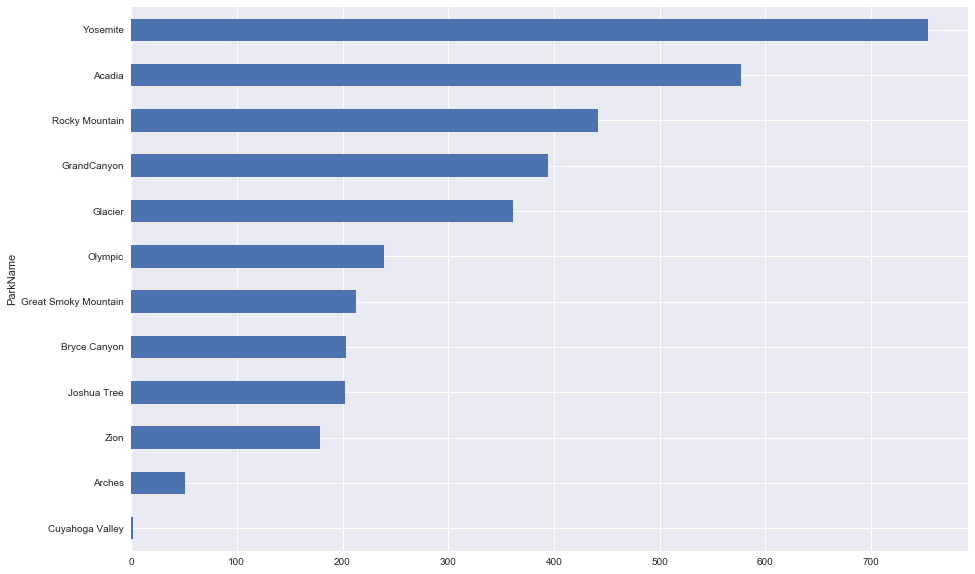

In [24]:
import seaborn as sns

#fig = plt.figure(figsize = (15,10))
#_ = sns.countplot(y = campground.ParkName)
#plt.show()

fig = plt.figure(figsize = (15,10))
campground.groupby('ParkName')['ParkName'].count().sort_values().plot.barh()
plt.show()

The stars of each campground on map

/Users/joshualee/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


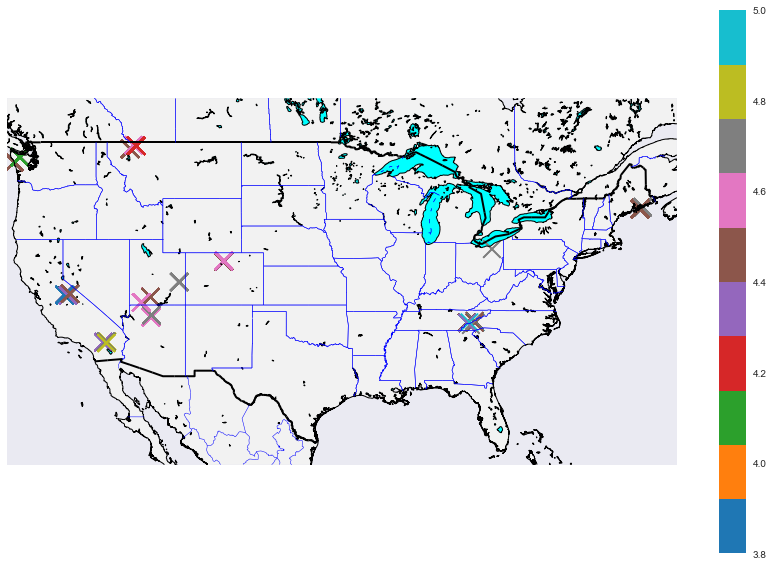

In [25]:
from mpl_toolkits.basemap import Basemap

fig2 = plt.figure(figsize = (15,10))
m = Basemap(projection = 'mill',
            llcrnrlat = 24.0, llcrnrlon = -125.0, 
            urcrnrlat = 52.0, urcrnrlon = -65.0, resolution = 'h')
m.drawcoastlines()
m.drawcountries(linewidth = 2)
m.drawstates(color = 'b')
m.fillcontinents(color = '#f2f2f2', lake_color = 'aqua', zorder = 1)
                
ax = fig2.add_subplot(111)
x, y = m(np.array(campground['Longtitude']), np.array(campground['Latitude']))
scatter1 = ax.scatter(x, y, 300, 
                      c = np.array(campground['Stars']),
                      marker = 'x',zorder = 1.5, cmap = plt.cm.tab10)
plt.colorbar(scatter1)
plt.show()

The reviews of each campground on map

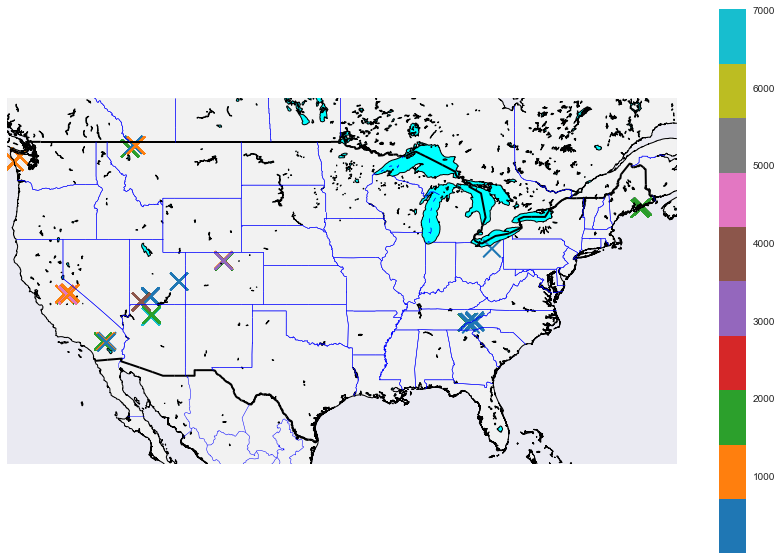

In [26]:
from mpl_toolkits.basemap import Basemap

fig2 = plt.figure(figsize = (15,10))
m = Basemap(projection = 'mill',
            llcrnrlat = 24.0, llcrnrlon = -125.0, 
            urcrnrlat = 52.0, urcrnrlon = -65.0, resolution = 'h')
m.drawcoastlines()
m.drawcountries(linewidth = 2)
m.drawstates(color = 'b')
m.fillcontinents(color = '#f2f2f2', lake_color = 'aqua', zorder = 1)
                
ax = fig2.add_subplot(111)
x, y = m(np.array(campground['Longtitude']), np.array(campground['Latitude']))
scatter1 = ax.scatter(x, y, 300, 
                      c = np.array(campground['Reviews']),
                      marker = 'x',zorder = 1.5, cmap = plt.cm.tab10)
plt.colorbar(scatter1)
plt.show()